In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
# convert the data of string type to datetime
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
#sort date data
df=df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df_close=df['Close']

Text(0.5, 1.0, 'Stock prediction')

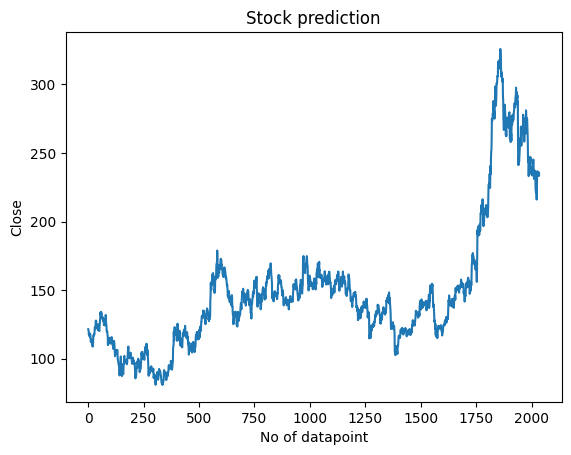

In [7]:
plt.plot(df_close)  
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [9]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

Windowed dataset


In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ##Here i=0 to 100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

MODEL

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 6s 151ms/step - loss: 0.0819 - accuracy: 8.4034e-04 - val_loss: 0.0333 - val_accuracy: 0.0000e+00
Epoch 2/60
19/19 [==============================] - 2s 113ms/step - loss: 0.0300 - accuracy: 8.4034e-04 - val_loss: 0.0362 - val_accuracy: 0.0000e+00
Epoch 3/60
19/19 [==============================] - 2s 113ms/step - loss: 0.0265 - accuracy: 8.4034e-04 - val_loss: 0.0329 - val_accuracy: 0.0000e+00
Epoch 4/60
19/19 [==============================] - 2s 102ms/step - loss: 0.0232 - accuracy: 8.4034e-04 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 5/60
19/19 [==============================] - 2s 96ms/step - loss: 0.0241 - accuracy: 8.4034e-04 - val_loss: 0.0272 - val_accuracy: 0.0000e+00
Epoch 6/60
19/19 [==============================] - 2s 98ms/step - loss: 0.0225 - accuracy: 8.4034e-04 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 7/60
19/19 [==============================] - 2s 98ms/step - loss: 0.0212 - accuracy: 8.4034e-04

19/19 [==============================] - 2s 101ms/step - loss: 0.0090 - accuracy: 8.4034e-04 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 56/60
19/19 [==============================] - 2s 97ms/step - loss: 0.0087 - accuracy: 8.4034e-04 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 57/60
19/19 [==============================] - 2s 97ms/step - loss: 0.0097 - accuracy: 8.4034e-04 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 58/60
19/19 [==============================] - 2s 96ms/step - loss: 0.0093 - accuracy: 8.4034e-04 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 59/60
19/19 [==============================] - 2s 95ms/step - loss: 0.0086 - accuracy: 8.4034e-04 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 60/60
19/19 [==============================] - 2s 94ms/step - loss: 0.0087 - accuracy: 8.4034e-04 - val_loss: 0.0088 - val_accuracy: 0.0000e+00


In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 18ms/step


In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.012640869649504364

In [19]:
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)

0.98

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.04975751386677847

In [21]:
np.round(metrics.r2_score(y_test, test_predict),2)

0.96

In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

Visualization

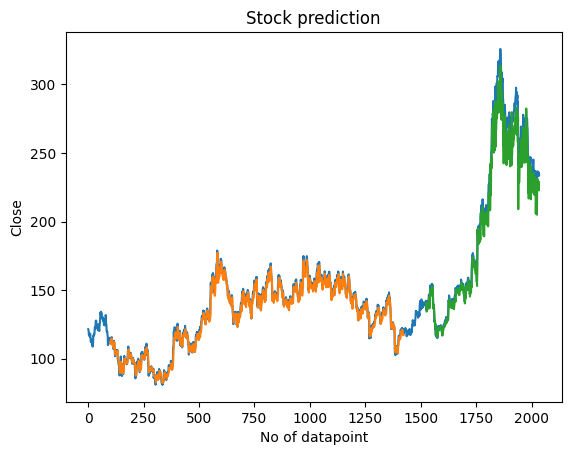

In [23]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')
plt.show()

Predict the next 60 days Stock Price

In [24]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i<60):

  if (len(temp_input)>100):

    # print(tem_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)

    lst_output.extend(yhat.tolist())
    i = i + 1

  else:

    x_input = x_input.reshape((1, n_steps, 1))
    
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

    lst_output.extend(yhat.tolist())
    i = i+1

print(lst_output)

[0.58926064]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

10 day output [[0.309698]]
11 day input [0.69138072 0.70894608 0.72263072 0.73406863 0.72120098 0.74979575
 0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268

20 day output [[0.27654114]]
21 day input [0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.58926064 0.52906299 0.4690519  0.42361632 0.39104792
 0.36665386 0.347800

30 day output [[0.24177054]]
31 day input [0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.62418301 0.58926064 0.52906299 0.4690519
 0.42361632 0.39104792 0.36665386 0.34780011 0.33343565 0.32284853
 0.31522256 0.30969799 0.30551356 0.30208248 0.29900041 0.29601821
 0.29300177 0.28989327 0.2

40 day output [[0.2113594]]
41 day input [0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.58926064
 0.52906299 0.4690519  0.42361632 0.39104792 0.36665386 0.34780011
 0.33343565 0.32284853 0.31522256 0.30969799 0.30551356 0.30208248
 0.29900041 0.29601821 0.29300177 0.28989327 0.28667974 0.28337085
 0.27998483 0.27654114 0.27305719 0.2695477  0.2660248  0.26249921
 0.2589803  0.2554767

50 day output [[0.1869404]]
51 day input [0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.58926064 0.52906299 0.4690519  0.42361632 0.39104792
 0.36665386 0.34780011 0.33343565 0.32284853 0.31522256 0.30969799
 0.30551356 0.30208248 0.29900041 0.29601821 0.29300177 0.28989327
 0.28667974 0.28337085 0.27998483 0.27654114 0.27305719 0.2695477
 0.2660248  0.26249921 0.2589803  0.25547677 0.25199667 0.2485477
 0.24513687 0.24177054 0.23845418 0.23519266 0.23198977 0.22884843
 0.22577079 0.22275813 

In [27]:
day_new = np.arange(1,101)
day_pred = np.arange(101,161)

In [28]:
df3 = df1.tolist()
df3.extend(lst_output)

In [29]:
len(df1)

2035

Text(0.5, 1.0, 'Stock prediction')

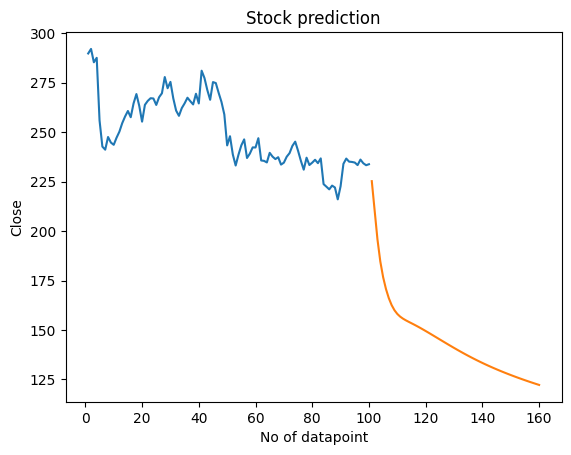

In [30]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')